In [54]:
# Jules Hauchecorne
# HAUJ21049307
import sys
import numpy as np

fichier_b_cereus = open("b_cereus.txt", 'r')
seq = fichier_b_cereus.readlines()
etats_possibles = ( "1", "2", "3", "4")
start_p = { "1": 0.611, "2": 0.1116, "3":0.1657, "4":0.1116 }

# algo de Viterbi repris de la page wikipedia   
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st] * emit_p[st] [obs[t]]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st] * emit_p[st] [obs[t]]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]

    print ("Le chemin d'état est " + " ".join(opt) + " avec la probabilité la plus élevée %s" % max_prob)
 
        
def evaluer_codons( seq_etat, seq2):
    nbr_etat_1_vers_1 = 0
    nbr_etat_1_vers_2 = 0
    nbr_etat_4_vers_1 = 0
    nbr_etat_4_vers_2 = 0
    nbr_A_etat_1 = 0
    nbr_C_etat_1 = 0
    nbr_G_etat_1 = 0
    nbr_T_etat_1 = 0
    nbr_A_etat_2 = 0
    nbr_C_etat_2 = 0
    nbr_G_etat_2 = 0
    nbr_T_etat_2 = 0
    nbr_A_etat_3 = 0
    nbr_C_etat_3 = 0
    nbr_G_etat_3 = 0
    nbr_T_etat_3 = 0
    nbr_A_etat_4 = 0
    nbr_C_etat_4 = 0
    nbr_G_etat_4 = 0
    nbr_T_etat_4 = 0
    # Mettre la pair en deux listes
    seq1 = seq_etat[0]
    etats = seq_etat[1]
    
    # calcule probabilité transitions
    for i in range(len(etats)-1):
        if( etats[i] == '1'):
            if(etats[i+1] == '1' ):
                nbr_etat_1_vers_1 += 1
            else:
                nbr_etat_1_vers_2 += 1
        elif( etats[i] == '4'):
            if( etats[i+1] == '1'):
                nbr_etat_4_vers_1 += 1
            else:
                nbr_etat_4_vers_2 +=1
    P_trans_état1_vers_1 = nbr_etat_1_vers_1/ ( nbr_etat_1_vers_1+ nbr_etat_1_vers_2)
    P_trans_état1_vers_2 = nbr_etat_1_vers_2/ ( nbr_etat_1_vers_1+ nbr_etat_1_vers_2)
    P_trans_état4_vers_1 = nbr_etat_4_vers_1/ ( nbr_etat_4_vers_1+ nbr_etat_4_vers_2)
    P_trans_état4_vers_2 = nbr_etat_4_vers_2/ ( nbr_etat_4_vers_1+ nbr_etat_4_vers_2)
    
    trans_p = {
        "1" : { "1": P_trans_état1_vers_1, "2": P_trans_état1_vers_2, "3": 0, "4":0 },
        "2" : { "1": 0, "2":0, "3" : 1, "4":0 },
        "3" : { "1": 0, "2":0, "3":0 , "4": 1},
        "4" : { "1": P_trans_état4_vers_1, "2": P_trans_état4_vers_2 , "3": 0, "4": 0}
    }
   
    # calcule probabilité émission
    for i in range(len(seq1)-1):
        if( etats[i] == '1'):
            if( seq1[i] == 'A'):
                nbr_A_etat_1 += 1
            if( seq1[i] == 'C'):
                nbr_C_etat_1 += 1
            if( seq1[i] == 'G'):
                nbr_G_etat_1 += 1
            if( seq1[i] == 'T'):
                nbr_T_etat_1 += 1
        elif( etats[i] == '2'):
            if( seq1[i] == 'A'):
                nbr_A_etat_2 += 1
            if( seq1[i] == 'C'):
                nbr_C_etat_2 += 1
            if( seq1[i] == 'G'):
                nbr_G_etat_2 += 1
            if( seq1[i] == 'T'):
                nbr_T_etat_2 += 1
        elif( etats[i] == '3'):
            if( seq1[i] == 'A'):
                nbr_A_etat_3 += 1
            if( seq1[i] == 'C'):
                nbr_C_etat_3 += 1
            if( seq1[i] == 'G'):
                nbr_G_etat_3 += 1
            if( seq1[i] == 'T'):
                nbr_T_etat_3 += 1
        elif( etats[i] == '4'):
            if( seq1[i] == 'A'):
                nbr_A_etat_4 += 1
            if( seq1[i] == 'C'):
                nbr_C_etat_4 += 1
            if( seq1[i] == 'G'):
                nbr_G_etat_4 += 1
            if( seq1[i] == 'T'):
                nbr_T_etat_4 += 1
                
    nbr_etat_1 = nbr_A_etat_1+nbr_C_etat_1+nbr_G_etat_1+nbr_T_etat_1
    P_emission_A_etat1 = nbr_A_etat_1/nbr_etat_1
    P_emission_C_etat1 = nbr_C_etat_1/nbr_etat_1
    P_emission_G_etat1 = nbr_G_etat_1/nbr_etat_1
    P_emission_T_etat1 = nbr_T_etat_1/nbr_etat_1
    nbr_etat_2 = nbr_A_etat_2+nbr_C_etat_2+nbr_G_etat_2+nbr_T_etat_2
    P_emission_A_etat2 = nbr_A_etat_2/nbr_etat_2
    P_emission_C_etat2 = nbr_C_etat_2/nbr_etat_2
    P_emission_G_etat2 = nbr_G_etat_2/nbr_etat_2
    P_emission_T_etat2 = nbr_T_etat_2/nbr_etat_2
    nbr_etat_3 = nbr_A_etat_3+nbr_C_etat_3+nbr_G_etat_3+nbr_T_etat_3
    P_emission_A_etat3 = nbr_A_etat_3/nbr_etat_3
    P_emission_C_etat3 = nbr_C_etat_3/nbr_etat_3
    P_emission_G_etat3 = nbr_G_etat_3/nbr_etat_3
    P_emission_T_etat3 = nbr_T_etat_3/nbr_etat_3
    nbr_etat_4 = nbr_A_etat_4+nbr_C_etat_4+nbr_G_etat_4+nbr_T_etat_4
    P_emission_A_etat4 = nbr_A_etat_4/nbr_etat_4
    P_emission_C_etat4 = nbr_C_etat_4/nbr_etat_4
    P_emission_G_etat4 = nbr_G_etat_4/nbr_etat_4
    P_emission_T_etat4 = nbr_T_etat_4/nbr_etat_4
    
    emission_p = {
        "1": { "A": P_emission_A_etat1, "C" : P_emission_C_etat1, "G": P_emission_G_etat1, "T": P_emission_T_etat1 },
        "2": { "A": P_emission_A_etat2, "C" : P_emission_C_etat2, "G": P_emission_G_etat2, "T": P_emission_T_etat2 },
        "3": { "A": P_emission_A_etat3, "C" : P_emission_C_etat3, "G": P_emission_G_etat3, "T": P_emission_T_etat3 },
        "4": { "A": P_emission_A_etat4, "C" : P_emission_C_etat4, "G": P_emission_G_etat4, "T": P_emission_T_etat4 }
    }
    
    # L'appel à la fonction viterbi fonctionne pour une courte liste d'observables , mais pas avec la 
    # séquence complète ce b_cereus.
    #viterbi( seq2, etats_possibles,start_p, trans_p, emission_p )
    
    # Courte séquence pour montrer que Viterbi fonctionne
    #viterbi( ['T', 'T', 'A', 'T', 'T' ], etats_possibles,start_p, trans_p, emission_p )
    
def score_nb_paires(nt1, nt2):
    """
    Entrée : nt1 (str) : un caractère
    Entrée : nt2 (str) : un caractère
    Sortie : (int) : -1 si la paire nt1, nt2 est valide (G, C), (A, U) ou (G, U)
                     +infinie sinon (pratiquement sys.maxsize)
    Fondamentalement, le score optimal va être -le nombre de paires de bases dans la structure!
    """
    d = {('C', 'G'):-1,
         ('A', 'U'):-1,
         ('G', 'U'):-1,
         ('G', 'C'):-1,
         ('U', 'A'):-1,
         ('U', 'G'):-1,
        }
    
    return d.get((nt1, nt2), sys.maxsize)

def nussinov(sequence, score, theta=3):
    """
    Entrée : sequence (str) : une séquence de caractère
    Entrée : score (fct) : une fonction de score
    Entrée : theta (int) : une distance minimale d'interaction (3 par défaut)
    Sortie : list[list] : Une liste de liste de taille |sequence|X|sequence| telle que la postion i, j
                          contient le score optimale, selon la fonction score et theta, pour la structure secondaire
                          sur la sous-sequence entre les positions i et j.
                
    """
    n = len(sequence)
    M = [[None] * n for _ in range(n)]
    for i in range(n):
        for j in range(i, min(i + theta + 1, n)):
            M[i][j] = 0
    for i in range(n, -1, -1):
        for j in range(i + theta + 1, n):
            M[i][j]  = M[i+1][j]
            M[i][j] = min(M[i][j], score(sequence[i], sequence[j]) + M[i+1][j-1])
            for k in range(i + theta + 1, j):
                M[i][j] = min(M[i][j], 
                              score(sequence[i], sequence[k]) + M[i+1][k-1] + M[k+1][j])
    return M

def nussinov_backtrack(i, j, sequence, score, M, theta=3):
    """Le backtrack"""
    if j == i:
        return '.'
    elif M[i][j] == M[i+1][j]:
        return '.' + nussinov_backtrack(i+1, j, sequence, score, M, theta=theta)
    elif M[i][j] == score(sequence[i], sequence[j]) + M[i+1][j-1]:
        return '(' + nussinov_backtrack(i+1, j-1, sequence, score, M, theta=theta) + ')'
    for k in range(i + theta + 1, j):
        if M[i][j] == score(sequence[i], sequence[k]) + M[i+1][k-1] + M[k+1][j]:
            return '(' + nussinov_backtrack(i+1, k-1, sequence, score, M, theta=theta) + ')' + nussinov_backtrack(k+1, j, sequence, score, M, theta=theta)

def structure_secondaire(seq):
    """Combine les 2 parties afin de prédire la structure avec le plus de paires de bases pour une séquence d'ARN"""
    return nussinov_backtrack(0, len(seq)-1, seq, score_nb_paires, nussinov(seq, score_nb_paires, theta=3), theta=3)

#structure_secondaire('AGCUAGCUAGUCGUACGUAGC')

# Comme mentionné dans le pds la méthode fonctionne pour des courtes séquences mais pas avec la 
# séquence du fichier b_cereus, pour tester décommenter l'appel à Viterbi dans la méthode evaluer_codons

evaluer_codons( seq, seq[0])


In [80]:

# Code utilisé pour trouver les valeurs des questions 1. b) et 1. d)

import sys
import numpy as np

fichier_b_cereus = open("b_cereus.txt", 'r')
seq = fichier_b_cereus.readlines()

def calcule_prob_transition(seq):
    nbr_etat_1_vers_1 = 0
    nbr_etat_1_vers_2 = 0
    nbr_etat_4_vers_1 = 0
    nbr_etat_4_vers_2 = 0
    
    for i in range(len(seq[1])-1):

        if( seq[1][i] == '1'):
            if(seq[1][i+1] == '1' ):
                nbr_etat_1_vers_1 += 1
            else:
                nbr_etat_1_vers_2 += 1
        elif( seq[1][i] == '4'):
            if( seq[1][i+1] == '1'):
                nbr_etat_4_vers_1 += 1
            else:
                nbr_etat_4_vers_2 +=1
   
    print("\nProbabilité transition de état 1 vers 1 : ", nbr_etat_1_vers_1/ ( nbr_etat_1_vers_1+ nbr_etat_1_vers_2))
    print("\nProbabilité transition de état 1 vers 2 : ", nbr_etat_1_vers_2/ ( nbr_etat_1_vers_1+ nbr_etat_1_vers_2))
    print( "\nProbabilité transition de état 4 vers 1 : ", nbr_etat_4_vers_1/ ( nbr_etat_4_vers_1+ nbr_etat_4_vers_2))
    print( "\nProbabilité transition de état 4 vers 2 : ", nbr_etat_4_vers_2/ ( nbr_etat_4_vers_1+ nbr_etat_4_vers_2))


def calcule_valeur_emission(seq):
  
    nbr_A_etat_1 = 0
    nbr_C_etat_1 = 0
    nbr_G_etat_1 = 0
    nbr_T_etat_1 = 0
    nbr_A_etat_2 = 0
    nbr_C_etat_2 = 0
    nbr_G_etat_2 = 0
    nbr_T_etat_2 = 0
    nbr_A_etat_3 = 0
    nbr_C_etat_3 = 0
    nbr_G_etat_3 = 0
    nbr_T_etat_3 = 0
    nbr_A_etat_4 = 0
    nbr_C_etat_4 = 0
    nbr_G_etat_4 = 0
    nbr_T_etat_4 = 0

    for i in range(len(seq[1])-1):
        if( seq[1][i] == '1'):
            if( seq[0][i] == 'A'):
                nbr_A_etat_1 += 1
            if( seq[0][i] == 'C'):
                nbr_C_etat_1 += 1
            if( seq[0][i] == 'G'):
                nbr_G_etat_1 += 1
            if( seq[0][i] == 'T'):
                nbr_T_etat_1 += 1
        elif( seq[1][i] == '2'):
            if( seq[0][i] == 'A'):
                nbr_A_etat_2 += 1
            if( seq[0][i] == 'C'):
                nbr_C_etat_2 += 1
            if( seq[0][i] == 'G'):
                nbr_G_etat_2 += 1
            if( seq[0][i] == 'T'):
                nbr_T_etat_2 += 1
        elif( seq[1][i] == '3'):
            if( seq[0][i] == 'A'):
                nbr_A_etat_3 += 1
            if( seq[0][i] == 'C'):
                nbr_C_etat_3 += 1
            if( seq[0][i] == 'G'):
                nbr_G_etat_3 += 1
            if( seq[0][i] == 'T'):
                nbr_T_etat_3 += 1
        elif( seq[1][i] == '4'):
            if( seq[0][i] == 'A'):
                nbr_A_etat_4 += 1
            if( seq[0][i] == 'C'):
                nbr_C_etat_4 += 1
            if( seq[0][i] == 'G'):
                nbr_G_etat_4 += 1
            if( seq[0][i] == 'T'):
                nbr_T_etat_4 += 1
    print( "état 1 : A-> ", nbr_A_etat_1, " C -> ", nbr_C_etat_1, " G-> ", nbr_G_etat_1, " T -> ", nbr_T_etat_1  )
    nbr_etat_1 = nbr_A_etat_1+nbr_C_etat_1+nbr_G_etat_1+nbr_T_etat_1
    print("\n état 1 prob émission A -> ", (nbr_A_etat_1/nbr_etat_1), " C -> " , ( nbr_C_etat_1/nbr_etat_1), " G -> ", (nbr_G_etat_1/nbr_etat_1), " T -> ", (nbr_T_etat_1/nbr_etat_1))
    print( "\n état 2 : A-> ", nbr_A_etat_2, " C -> ", nbr_C_etat_2, " G-> ", nbr_G_etat_2, " T -> ", nbr_T_etat_2  )
    nbr_etat_2 = nbr_A_etat_2+nbr_C_etat_2+nbr_G_etat_2+nbr_T_etat_2
    print("\n état 2 prob émission A -> ", (nbr_A_etat_2/nbr_etat_2), " C -> " , ( nbr_C_etat_2/nbr_etat_2), " G -> ", (nbr_G_etat_2/nbr_etat_2), " T -> ", (nbr_T_etat_2/nbr_etat_2))
    print( "\n état 3 : A-> ", nbr_A_etat_3, " C -> ", nbr_C_etat_3, " G-> ", nbr_G_etat_3, " T -> ", nbr_T_etat_3  )
    nbr_etat_3 = nbr_A_etat_3+nbr_C_etat_3+nbr_G_etat_3+nbr_T_etat_3
    print("\n état 3 prob émission A -> ", (nbr_A_etat_3/nbr_etat_3), " C -> " , ( nbr_C_etat_3/nbr_etat_3), " G -> ", (nbr_G_etat_3/nbr_etat_3), " T -> ", (nbr_T_etat_3/nbr_etat_3))
    print( "\n état 4 : A-> ", nbr_A_etat_4, " C -> ", nbr_C_etat_4, " G-> ", nbr_G_etat_4, " T -> ", nbr_T_etat_4  )
    nbr_etat_4 = nbr_A_etat_4+nbr_C_etat_4+nbr_G_etat_4+nbr_T_etat_4
    print("\n état 4 prob émission A -> ", (nbr_A_etat_4/nbr_etat_4), " C -> " , ( nbr_C_etat_4/nbr_etat_4), " G -> ", (nbr_G_etat_4/nbr_etat_4), " T -> ", (nbr_T_etat_4/nbr_etat_4))

        
    
calcule_valeur_emission( seq)
calcule_prob_transition( seq)

état 1 : A->  1064357  C ->  670677  G->  553992  T ->  1166798

 état 1 prob émission A ->  0.30798935362449015  C ->  0.19407151521605268  G ->  0.16030677488205416  T ->  0.337632356277403

 état 2 : A->  199910  C ->  95468  G->  206385  T ->  129577

 état 2 prob émission A ->  0.3166439636329078  C ->  0.15121487629486488  G ->  0.326899927139101  T ->  0.20524123293312638

 état 3 : A->  215319  C ->  122390  G->  89857  T ->  203774

 état 3 prob émission A ->  0.3410507808787658  C ->  0.1938575094243989  G ->  0.14232743054455602  T ->  0.3227642791522793

 état 4 : A->  241043  C ->  65863  G->  97978  T ->  226456

 état 4 prob émission A ->  0.3817958627680806  C ->  0.10432255203218552  G ->  0.15519054709031582  T ->  0.35869103810941805

Probabilité transition de état 1 vers 1 :  0.9993306950816939

Probabilité transition de état 1 vers 2 :  0.0006693049183060249

Probabilité transition de état 4 vers 1 :  0.0036652200082364496

Probabilité transition de état 4 vers 2 :

In [25]:

# Question 2. a)

import sys
import numpy as np
# distance 1 et 1 = 0 
structure_exemple_1 = "(..)"
# distance 2 et 3 = 1
structure_exemple_2 = "(..)"
structure_exemple_3 = "(())"
# distance entre 4 et 5 = 2
structure_exemple_4 = "(.)."
structure_exemple_5 = "(..)"
# distance entre structure 6 et 7 = 4
structure_exemple_6 = "(())"
structure_exemple_7 = "()()"
structure_exemple_8 = "((((((..((((.(((((....)))))....))))....((....))))))))"

# Compare la distance minimal entre deux structures
def distance_structures(structure1, structure2):
    distance = 0
    paires_s1 = []
    paires_s2 = []
    position_début_paire1 = []
    position_début_paire2 = []
    
    # analyse structure 1
    for x in range (len(structure1)):
        if( structure1[x] == '(' ):
            position_début_paire1.append(x)
        elif( structure1[x] == ')' ):
            paires_s1.append( ( position_début_paire1[len(position_début_paire1)-1] , x ) )
            position_début_paire1.pop()        
        # Duplication de code parce qu'il est demandé dans l'énoncé de faire le travail dans cette fonction, 
        # idéalement une deuxième méthode aurait été appelé pour analyser la structure et retourner un objets 
        # avec les paires
        
        # analyse structure 2
    for x in range (len(structure2)):
        if( structure2[x] == '(' ):
            position_début_paire2.append(x)
        elif( structure2[x] == ')' ):
            paires_s2.append( ( position_début_paire2[len(position_début_paire2)-1] , x ) )
            position_début_paire2.pop()         
    
    # comparaison paire
    for x in range (len(paires_s2)):
        if( paires_s1.count(paires_s2[x]) == 0):
            distance += 1
    for x in range( len(paires_s1)):
        if( paires_s2.count(paires_s1[x]) == 0):
            distance +=1
  
    return distance     

# appel de distance pour tester            
distance = distance_structures( structure_exemple_2 , structure_exemple_3)    
print( distance)
    

1


In [103]:

# Question 2. b)

import sys
import numpy as np
import random


seq1_exemple = "ACGU"
seq2_exemple = "ACCAGUGACUAACGU"

# Fait une mutation d'une séquence selon une probabilité passé en paramêtre
def mutate( sequence, proba):
    sequence_mutee = ""
    mutation = [ 'A', 'C', 'G', 'U']
    for x in range(len(sequence)):
        if( random.random() <= proba):
            mutation_possible = mutation.copy()
            mutation_possible.remove(sequence[x])
            sequence_mutee += str(random.choice(mutation_possible))
            
        else:
            sequence_mutee += sequence[x]
    return sequence_mutee
            
# Tester fonction mutate    
sequence_mutee = mutate( seq2_exemple, 0.2)
print( sequence_mutee)    

ACCUUUGACUAACGU


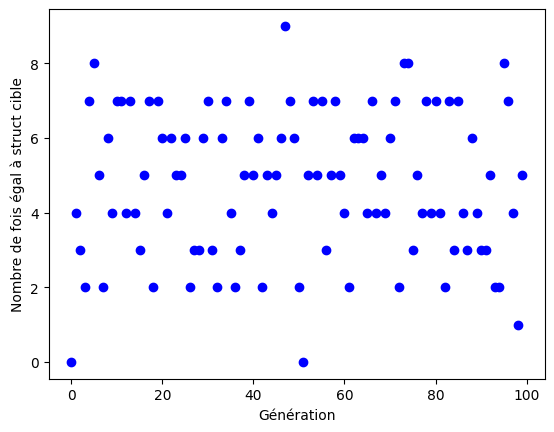

In [57]:

# Question 2. c) d) et e)  *Reprend le code de 2.a) et 2.b) et méthodes nussinov donné de base
import sys
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

generation_exemple = [
    "ACGUACGUACGU",
    "ACGUGUAACCGU",
    "GGCUACGUACGU",
    "UUAGUCAAUGAC"
]
structure_cible_exemple = '.(((....).))'
    
def score_nb_paires(nt1, nt2):
    """
    Entrée : nt1 (str) : un caractère
    Entrée : nt2 (str) : un caractère
    Sortie : (int) : -1 si la paire nt1, nt2 est valide (G, C), (A, U) ou (G, U)
                     +infinie sinon (pratiquement sys.maxsize)
    Fondamentalement, le score optimal va être -le nombre de paires de bases dans la structure!
    """
    d = {('C', 'G'):-1,
         ('A', 'U'):-1,
         ('G', 'U'):-1,
         ('G', 'C'):-1,
         ('U', 'A'):-1,
         ('U', 'G'):-1,
        }
    
    return d.get((nt1, nt2), sys.maxsize)

def nussinov(sequence, score, theta=3):
    """
    Entrée : sequence (str) : une séquence de caractère
    Entrée : score (fct) : une fonction de score
    Entrée : theta (int) : une distance minimale d'interaction (3 par défaut)
    Sortie : list[list] : Une liste de liste de taille |sequence|X|sequence| telle que la postion i, j
                          contient le score optimale, selon la fonction score et theta, pour la structure secondaire
                          sur la sous-sequence entre les positions i et j.
                
    """
    n = len(sequence)
    M = [[None] * n for _ in range(n)]
    for i in range(n):
        for j in range(i, min(i + theta + 1, n)):
            M[i][j] = 0
    for i in range(n, -1, -1):
        for j in range(i + theta + 1, n):
            M[i][j]  = M[i+1][j]
            M[i][j] = min(M[i][j], score(sequence[i], sequence[j]) + M[i+1][j-1])
            for k in range(i + theta + 1, j):
                M[i][j] = min(M[i][j], 
                              score(sequence[i], sequence[k]) + M[i+1][k-1] + M[k+1][j])
    return M

def nussinov_backtrack(i, j, sequence, score, M, theta=3):
    """Le backtrack"""
    if j == i:
        return '.'
    elif M[i][j] == M[i+1][j]:
        return '.' + nussinov_backtrack(i+1, j, sequence, score, M, theta=theta)
    elif M[i][j] == score(sequence[i], sequence[j]) + M[i+1][j-1]:
        return '(' + nussinov_backtrack(i+1, j-1, sequence, score, M, theta=theta) + ')'
    for k in range(i + theta + 1, j):
        if M[i][j] == score(sequence[i], sequence[k]) + M[i+1][k-1] + M[k+1][j]:
            return '(' + nussinov_backtrack(i+1, k-1, sequence, score, M, theta=theta) + ')' + nussinov_backtrack(k+1, j, sequence, score, M, theta=theta)

def structure_secondaire(seq):
    """Combine les 2 parties afin de prédire la structure avec le plus de paires de bases pour une séquence d'ARN"""
    return nussinov_backtrack(0, len(seq)-1, seq, score_nb_paires, nussinov(seq, score_nb_paires, theta=3), theta=3)


# Compare la distance minimal entre deux structures
def distance_structures(structure1, structure2):
    distance = 0
    paires_s1 = []
    paires_s2 = []
    position_début_paire1 = []
    position_début_paire2 = []
    paires_manquantes  = []
    paires_de_trop = []
    
    # analyse structure 1
    for x in range (len(structure1)):
        if( structure1[x] == '(' ):
            position_début_paire1.append(x)
        elif( structure1[x] == ')' ):
            paires_s1.append( ( position_début_paire1[len(position_début_paire1)-1] , x ) )
            position_début_paire1.pop()        
        # Duplication de code parce qu'il est demandé dans l'énoncé de faire le travail dans cette fonction, 
        # idéalement une deuxième méthode aurait été appelé pour analyser la structure et retourner un objets 
        # avec les paires
        
        # analyse structure 2
    for x in range (len(structure2)):
        if( structure2[x] == '(' ):
            position_début_paire2.append(x)
        elif( structure2[x] == ')' ):
            paires_s2.append( ( position_début_paire2[len(position_début_paire2)-1] , x ) )
            position_début_paire2.pop()         
    
    # comparaison paire
    for x in range (len(paires_s2)):
        if( paires_s1.count(paires_s2[x]) == 0):
            distance += 1
    for x in range( len(paires_s1)):
        if( paires_s2.count(paires_s1[x]) == 0):
            distance +=1
  
    return distance  

# Fait une mutation d'une séquence selon une probabilité passé en paramêtre
def mutate( sequence, proba):
    sequence_mutee = ""
    mutation = [ 'A', 'C', 'G', 'U']
    for x in range(len(sequence)):
        if( random.random() <= proba):
            mutation_possible = mutation.copy()
            mutation_possible.remove(sequence[x])
            sequence_mutee += str(random.choice(mutation_possible))
            
        else:
            sequence_mutee += sequence[x]
    return sequence_mutee

def evolue_generation( generation, cible, proba):
    gen_tmp = []
    p_sequences = []
    P_seq = []
    struc_cible = cible  

    for x in range(len(generation)):
        gen_tmp.append( mutate( generation[x], proba))
       
    for x in range(len(gen_tmp)):
        struc1 = structure_secondaire( gen_tmp[x])
        p_sequences.append( 1/(1+ distance_structures( struc1, struc_cible)))
        
    
    for x in range(len(gen_tmp)):
        P_seq.append( (p_sequences[x])/(sum(p_sequences)))
        for y in range(100):
            gen_tmp[x] = mutate( gen_tmp[x], P_seq[x])
    return gen_tmp       
 
def visualiser_evolution(cible):
    n = len( cible)
    generation = []
    sequence_aleatoire = ""
    nbr_struc_egal_cible = []
    probabilite = 1/n
    for x in range(n):
        sequence_aleatoire += random.choice(['A', 'C', 'G', 'U'])
    for x in range(100):
        generation.append( sequence_aleatoire)
    for x in range(100):
        nbr_tmp = 0
        for y in range(len(generation)):           
            if( distance_structures(structure_secondaire(generation[y]) , cible ) == 0):
                nbr_tmp += 1
        nbr_struc_egal_cible.append( nbr_tmp)
        generation = evolue_generation( generation, cible, probabilite)
    
    # affichage
    plt.plot(nbr_struc_egal_cible, 'bo')
    plt.ylabel("Nombre de fois égal à struct cible")
    plt.xlabel("Génération")
    plt.show()         

# tests evolue_generation
#new_gen = evolue_generation(generation_exemple, structure_cible_exemple, probabilite )
#print( generation_exemple)
#print( new_gen)
#visualiser_evolution('(((...)))...(((...)))')
visualiser_evolution('(((...)))')


